# Machine Learning Python

Loading and plotting

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Plotting the iris Data

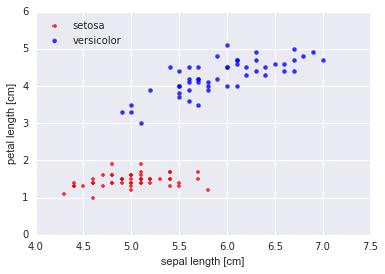

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# select setosa and versicolor
y = df.iloc[0:100, 4].values
# After taking the variables, codify the predicted variable
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
sns.regplot(X[:50, 0], X[:50, 1],
            color='red', label='setosa', marker = "+", fit_reg = False)
sns.regplot(X[50:100, 0], X[50:100, 1],
            color='blue', label='versicolor', fit_reg = False)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

Response and predictor variables

In [14]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


## Random Split and Standardization

In [17]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=21)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# Same transformation for both datasets.

## Fitting a perceptron

In [18]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [21]:
y_pred = ppn.predict(X_test_std)
# Result np.array
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


## Classification Accuracy

In [22]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


## Fitting a Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9333


Note: in scikit-learn, the regularization parameter for the logistic regression is C, the inverse of lambda. That is:
$C = \frac{1}{\lambda} $ Thus, as C decreases, we are increasing the regularization.

To predict probabilities:

In [31]:
lr.predict_proba(X_test_std[0:10,:])

array([[  1.28261729e-04,   9.99871734e-01,   3.85231188e-09],
       [  8.07251699e-01,   1.92748301e-01,   1.08981637e-30],
       [  8.10628071e-01,   1.89371929e-01,   2.53347517e-35],
       [  8.51602078e-01,   1.48397922e-01,   1.19662325e-32],
       [  4.99333149e-05,   9.99950033e-01,   3.34145807e-08],
       [  4.06375383e-06,   9.99832625e-01,   1.63311682e-04],
       [  7.86994992e-01,   2.13005008e-01,   2.40830985e-34],
       [  7.13064322e-10,   1.92536146e-01,   8.07463853e-01],
       [  8.41105426e-01,   1.58894574e-01,   3.69908161e-32],
       [  8.31741996e-01,   1.68258004e-01,   5.51128587e-34]])

## Support Vector Machines (SVM)

Note: in scikit-learn, the regularization parameter for the SVM is C, the inverse of lambda. That is:
$C = \frac{1}{\lambda} $ Thus, as C decreases, we are increasing the regularization.

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9333


When using RBF-kernel, the $\gamma$ parameter is the inverse of the standardizing parameter: $\gamma = \frac{1}{2\sigma^2}$ . Thus, the higher the gamma, the lower the standardizing and the more similar will all the observations appear. Thus, the higher the gamma, the lower our regularization level. Thus, both regularizing terms in SVM are the strongest when they have low values

In [37]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9556


But if we secularly increase both C and gamma:

In [39]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
# Let the C be, but secularly increase gamma and thus decrease the regularization.
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
# Our prediction suffers, due to overfitting.

Accuracy: 0.8667


## Fitting a Decision TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.3333


## Fitting Random Trees

Benefit: not that many hyperparameters to tune. Just number of trees.

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=5000, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.3333


## Fitting K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Accuracy: 0.9556
